<a href="https://colab.research.google.com/github/davisidarta/topometry/blob/master/Non_euclid_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding to non-euclidean spaces with MAP

Here's an introduction to embedding into non-euclidean spaces with MAP.

In [5]:
# Install some packages
!pip install scanpy pymde umap-learn hnswlib nmslib kneed

In [2]:
!pip install -i https://test.pypi.org/simple/ topometry==0.0.2.7

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 92kB 3.6MB/s 


In [7]:
import scanpy as sc
import topo as tp

In [9]:
adata = sc.datasets.pbmc3k_processed()

Building topological basis...


/usr/local/lib/python3.7/dist-packages/topo/tpgraph/diffusion.py:368: RuntimeWarning: invalid value encountered in power
  dists = (dists_new / (adap_nbr[x_new] + 1e-10)) ** np.power(2, ((self.new_k - pm[x_new]) / pm[y_new]))


Diffusion time = 81.258272 (sec), per sample=0.030803 (sec), per sample adjusted for thread number=0.369636 (sec)
Multiscaled a maximum of 43 computed diffusion components.
Multiscale decomposition time = 0.610555 (sec), per sample=0.000231 (sec), per sample adjusted for thread number=0.002777 (sec)


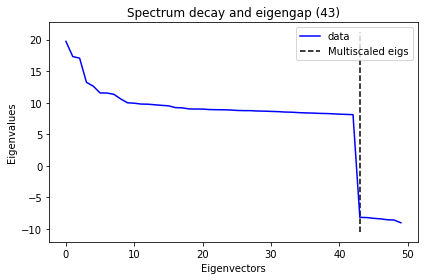

Topological basis fitted with diffusion mappings in 82.152957 (sec)
Building topological graph...
Diffusion time = 0.293223 (sec), per sample=0.000111 (sec), per sample adjusted for thread number=0.001334 (sec)
Topological graph extracted in = 0.295617 (sec)
Fuzzy layout optimization embedding in = 7.328306 (sec)


In [26]:
# Start up the TopOGraph
tg = tp.models.TopOGraph(n_jobs=12,
                         verbose=True,
                         backend='hnwslib',
                         plot_spectrum=True)
tg      

tg.fit(adata.X)
db_diff_graph = tg.transform()

# Minimize divergence between the diffusion basis and diffusion graph
emb_db_diff_map, aux = tg.MAP() # by default computes a spectral initialisation

In [27]:
sc.tl.leiden(adata, adjacency=db_diff_graph)

In [28]:
labels = adata.obs['leiden'].astype('int')

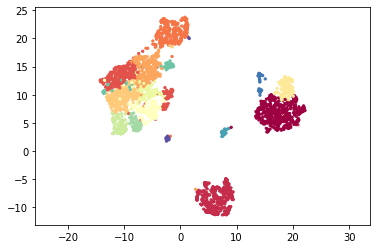

In [29]:
tp.pl.scatter(emb_db_diff_map, labels=labels)

Fuzzy layout optimization embedding in = 7.743317 (sec)


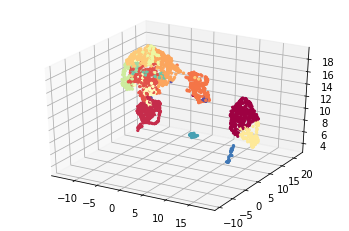

In [31]:
db_diff_emb3d, aux = tg.MAP(n_components=3)
tp.pl.scatter3d(db_diff_emb3d, labels=labels)

Fuzzy layout optimization embedding in = 7.507154 (sec)


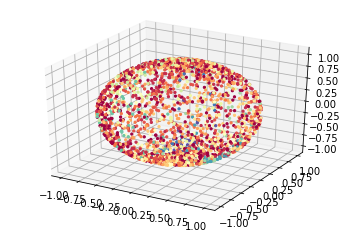

In [32]:
db_diff_sphere, aux = tg.MAP(output_metric='haversine')
tp.pl.sphere(db_diff_sphere, labels=labels)

Fuzzy layout optimization embedding in = 7.482364 (sec)


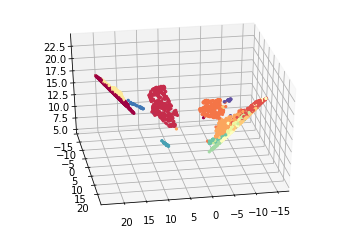

In [33]:
db_dmap_hyper, aux = tg.MAP(output_metric='hyperboloid')
tp.pl.hyperboloid(db_dmap_hyper, labels=labels)

Fuzzy layout optimization embedding in = 8.046667 (sec)


/usr/local/lib/python3.7/dist-packages/topo/plot.py:133: RuntimeWarning: invalid value encountered in sqrt
  width, height = np.sqrt(width), np.sqrt(height)


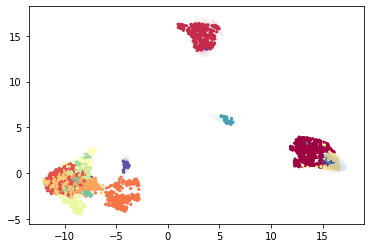

In [34]:
db_dmap_gauss, aux = tg.MAP(output_metric='gaussian_energy', n_components=5)
tp.pl.gaussian_potential(db_dmap_gauss, labels=labels)

Fuzzy layout optimization embedding in = 7.637756 (sec)


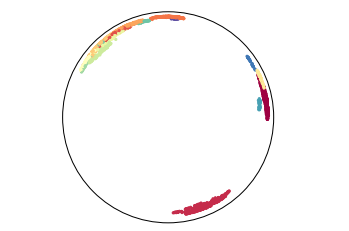

In [35]:
db_dmap_poinc, aux = tg.MAP(n_components=2, output_metric='poincare')
tp.pl.poincare(db_dmap_poinc, labels=labels)

Fuzzy layout optimization embedding in = 7.434912 (sec)


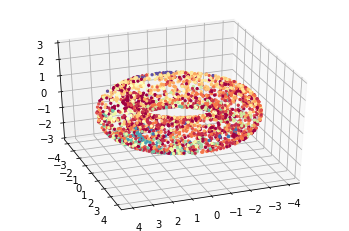

In [36]:
db_dmap_torus, aux = tg.MAP(n_components=2, output_metric='torus')
tp.pl.toroid(db_dmap_torus, labels=labels)